create_to_schedule 0
client_create_to_schedule 0
create_to_client_schedule 704.809432
client_create_to_client_schedule 12.177832
schedule_to_run 2000
client_schedule_to_run 1274.241294
schedule_to_client_run 5688.385413
client_schedule_to_client_run 4960.89961
run_to_watch 4087.587851
schedule_to_watch 5688.372361
pod_startup 5688.372361
calculated schedule_to_run: 1600.78451
calculated create_to_schedule: 0.0


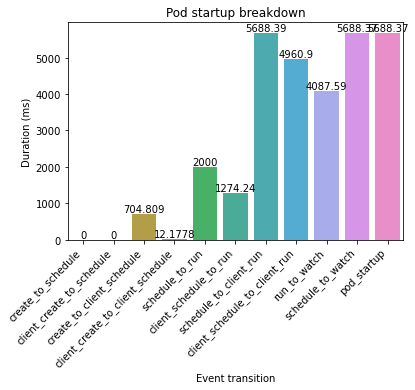

In [2]:
import matplotlib
import json
import seaborn

# import seaborn

file = "PodStartupLatency_PodStartupLatency_test_2021-12-09T17:50:07Z.json"
file = f"results/{file}"

j = json.loads(open(file, "r").read())

dataItems = j["dataItems"]

metrics = [
    "create_to_schedule",  # time to write to etcd, pick up at scheduler and assign to node (write back to etcd)
    "client_create_to_schedule",
    "create_to_client_schedule",
    "client_create_to_client_schedule",
    "schedule_to_run",  # time for node to pick up pod, pull image and get it running
    "client_schedule_to_run",
    "schedule_to_client_run",
    "client_schedule_to_client_run",
    "run_to_watch",  # time from starting running for the observed status to be sent on a watch stream
    "schedule_to_watch",  # time from it being scheduled until it is started and available to watch
    "pod_startup",  # time for whole startup
]

for item in dataItems:
    if item["labels"]["Metric"] not in metrics:
        print(f"Missed metric: {item['labels']['Metric']}")

medians = {}
for metric in metrics:
    for item in dataItems:
        m = item["labels"]["Metric"]
        if m == metric:
            median = item["data"]["Perc50"]
            print(f"{metric} {median}")
            medians[metric] = int(median)

ax = seaborn.barplot(x=metrics, y=[m for m in medians.values()])
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
ax.set_title("Pod startup breakdown")
ax.set_xlabel("Event transition")
ax.set_ylabel("Duration (ms)")
print(
    f"calculated schedule_to_run: {medians['schedule_to_watch'] - medians['run_to_watch']}"
)
print(
    f"calculated create_to_schedule: {medians['pod_startup'] - medians['schedule_to_watch']}"
)
